In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.models import save_model, load_model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
 
 
from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta, Adamax, Ftrl, Nadam

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.insert(0, '/content/drive/My Drive/LEI')

In [ ]:
!unzip -q '/content/drive/My Drive/LEI/Data'

#### Load Symptom Dataset

In [ ]:
data = pd.read_csv('./Data/dataset.csv', sep = ',')

####  Load Symptom Severity 

In [ ]:
severity = pd.read_csv('./Data/Symptom-severity.csv')

####  Load Exam Mapping

In [ ]:
mapping = pd.read_csv('./Data/map.csv', sep = ';')

# Pre-processing

### One-hot encoding of Symptoms + Mapping the severity of the symptoms

In [ ]:
symptomsCols = pd.unique(data.drop('Disease',1).values.flatten())
onlySymptomsCols=[]
for elem in (symptomsCols[symptomsCols==symptomsCols]):
    onlySymptomsCols.append(elem.replace(' ',''))

weightsFromSymptom = dict()

indexing = severity.to_dict()['Symptom']
weights = severity.to_dict()['Weight']
for elem in indexing:
    weightsFromSymptom[indexing[elem].replace(' ','')]=weights[elem]

for elem in onlySymptomsCols:
    if(elem.replace(' ', '') not in indexing.values()):
        weightsFromSymptom[elem.replace(' ','')]=1

symptomsCols = np.insert(onlySymptomsCols, 0, 'Disease')
symptomsCols

dataf = []
for elem in data.values:
    line=[]
    line.append(elem[0])
    elemlist=[]
    oldline = elem.tolist()
    for e in (oldline):
        if(e==e):
            elemlist.append(e.replace(' ', ''))
    del elemlist[0]
    for symptom in onlySymptomsCols:
        if(elemlist.count(symptom)>0):
            weight = weightsFromSymptom[symptom.replace(' ','')]
            line.append(weight)
        else:
            line.append(0)
    dataf.append(line)

processedDataf = pd.DataFrame(data=dataf, columns=symptomsCols)
processedDataf.to_csv("./Data/processed.csv", index=False )
processedDataf

,Disease,itching,skinrash,nodalskineruptions,dischromicpatches,continuoussneezing,shivering,chills,wateringfromeyes,stomachpain,acidity,ulcersontongue,vomiting,cough,chestpain,yellowishskin,nausea,lossofappetite,abdominalpain,yellowingofeyes,burningmicturition,spottingurination,passageofgases,internalitching,indigestion,musclewasting,patchesinthroat,highfever,extramaritalcontacts,fatigue,weightloss,restlessness,lethargy,irregularsugarlevel,blurredanddistortedvision,obesity,excessivehunger,increasedappetite,polyuria,sunkeneyes,...,bloodystool,irritationinanus,cramps,bruising,swollenlegs,swollenbloodvessels,prominentveinsoncalf,weightgain,coldhandsandfeets,moodswings,puffyfaceandeyes,enlargedthyroid,brittlenails,swollenextremeties,abnormalmenstruation,muscleweakness,anxiety,slurredspeech,palpitations,dryingandtinglinglips,kneepain,hipjointpain,swellingjoints,painfulwalking,movementstiffness,spinningmovements,unsteadiness,pusfilledpimples,blackheads,scurring,bladderdiscomfort,foulsmellofurine,continuousfeelofurine,skinpeeling,silverlikedusting,smalldentsinnails,inflammatorynails,blister,redsorearoundnose,yellowcrustooze
0,Fungal infection,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0
4916,Acne,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,0,0,0,0,0,0,0,0,0,0
4917,Urinary tract infection,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0
4918,Psoriasis,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0


### One-hot encoding of exams and diseases

In [ ]:
mapeamentoCols = pd.unique(mapping.drop('Disease',1).values.flatten())

onlyTestCols=[]
onlyTestCols = mapeamentoCols[mapeamentoCols==mapeamentoCols]
dfCols = np.insert(onlyTestCols, 0, 'Disease')

dfValues = []
for elem in mapping.values:
    line=[]
    line.append(elem[0])
    elemlist= elem.tolist()
    del elemlist[0]
    for test in onlyTestCols:
        if(elemlist.count(test)>0):
            line.append(1)
        else:
            line.append(0)
    dfValues.append(line)

testsDf = pd.DataFrame(data=dfValues, columns=dfCols)
testsDf.to_csv("./Data/mapProcessed.csv", index=False)

testsDf

,Disease,Blood Tests,Skin biopsy,Patch test,Complete blood count (CBC),Polymerase chain reaction (PCR),Skin Prick Test (SPT),Intradermal Skin Test,Physical Examination,TSH test,T4 test,Thyroid scan,Thyroid ultrasound,Esophagram,Esophageal manometry,pH monitoring,Endoscopy,Biopsy of upper disgestive system,X-ray of upper digestive system,Serum bilirubin test,Serum albumin test,Serum alkaline phosphatase test,Serum aminotransferases (transaminases),Prothrombin time (PTT) test,Alanine transaminase (ALT) test,Liver Ultrasound,Liver Biopsy,MRI Scan,CT Scan,X-ray,Electronystagmography (ENG),Videonystagmography (VNG),Fasting plasma glucose (FPG) test,Hemoglobin A1C test,Random plasma glucose (RPG) test,Blood Test,Electrocardiogram (ECG),Echocardiogram,Ambulatory monitoring,Urine analysis,...,Western Blot,Brain MRI Scan,Carotid Ultrasound,Cerebral angiogram,Stool tests,Bone marrow test,Tissue culture,KOH prep,Fungal culture,Antigent and Antibody testing,Sputum test,Susceptability testing,Gram Strain,Sinus X-ray,Electroencephalogram,Eye Exam,Spirometry,Exhaled nitric oxide test,Peak flow meter test,Liver CT Scan,Liver MRI Scan,Biopsy,Ultrasound,Dengue NS1 antigen test,Serological tests,IgG antibody testing,Nucleic acid amplification tests (NAATs),Coronary catheterization (angiogram),Cardiac CT,Cardiac MRI,Pleural fluid culture,Pulse oximetry,Anti-cyclic citrullinated peptide (anti-CCP),Erythrocyte sedimentation rate (ESR),C-reactive protein (CRP),Antinuclear antibody (ANA),HLA-B27,Stool culture,Antigen Tests,Mantoux tuberculin skin test
0,Drug Reaction,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Malaria,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Allergy,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Hypothyroidism,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Psoriasis,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,GERD,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Chronic cholestasis,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,hepatitis A,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Osteoarthristis,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,(vertigo) Paroymsal Positional Vertigo,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Dataframe with all Symptoms + Exams associated with a Disease

In [ ]:
finalDfCols= np.concatenate([onlyTestCols,onlySymptomsCols])

dfValues = []
for elem in processedDataf.values:
    for testLine in testsDf.values:
        if(testLine[0]==elem[0]):
            line= np.concatenate([testLine[1:], elem[1:]])
            dfValues.append(line)

finalDf = pd.DataFrame(data=dfValues, columns=finalDfCols)
finalDf.to_csv("./Data/final.csv", index=False)
finalDf

,Blood Tests,Skin biopsy,Patch test,Complete blood count (CBC),Polymerase chain reaction (PCR),Skin Prick Test (SPT),Intradermal Skin Test,Physical Examination,TSH test,T4 test,Thyroid scan,Thyroid ultrasound,Esophagram,Esophageal manometry,pH monitoring,Endoscopy,Biopsy of upper disgestive system,X-ray of upper digestive system,Serum bilirubin test,Serum albumin test,Serum alkaline phosphatase test,Serum aminotransferases (transaminases),Prothrombin time (PTT) test,Alanine transaminase (ALT) test,Liver Ultrasound,Liver Biopsy,MRI Scan,CT Scan,X-ray,Electronystagmography (ENG),Videonystagmography (VNG),Fasting plasma glucose (FPG) test,Hemoglobin A1C test,Random plasma glucose (RPG) test,Blood Test,Electrocardiogram (ECG),Echocardiogram,Ambulatory monitoring,Urine analysis,Upper gastrointestinal endoscopy,...,bloodystool,irritationinanus,cramps,bruising,swollenlegs,swollenbloodvessels,prominentveinsoncalf,weightgain,coldhandsandfeets,moodswings,puffyfaceandeyes,enlargedthyroid,brittlenails,swollenextremeties,abnormalmenstruation,muscleweakness,anxiety,slurredspeech,palpitations,dryingandtinglinglips,kneepain,hipjointpain,swellingjoints,painfulwalking,movementstiffness,spinningmovements,unsteadiness,pusfilledpimples,blackheads,scurring,bladderdiscomfort,foulsmellofurine,continuousfeelofurine,skinpeeling,silverlikedusting,smalldentsinnails,inflammatorynails,blister,redsorearoundnose,yellowcrustooze
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4675,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0
4676,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,0,0,0,0,0,0,0,0,0,0
4677,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0
4678,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0


In [ ]:
print(onlyTestCols)
print(len(onlyTestCols))
print(len(onlySymptomsCols))

['Blood Tests' 'Skin biopsy' 'Patch test' 'Complete blood count (CBC)'
 'Polymerase chain reaction (PCR)' 'Skin Prick Test (SPT)'
 'Intradermal Skin Test' 'Physical Examination' 'TSH test' 'T4 test'
 'Thyroid scan' 'Thyroid ultrasound' 'Esophagram' 'Esophageal manometry'
 'pH monitoring' 'Endoscopy' 'Biopsy of upper disgestive system'
 'X-ray of upper digestive system' 'Serum bilirubin test'
 'Serum albumin test' 'Serum alkaline phosphatase test'
 'Serum aminotransferases (transaminases)' 'Prothrombin time (PTT) test'
 'Alanine transaminase (ALT) test' 'Liver Ultrasound' 'Liver Biopsy'
 'MRI Scan' 'CT Scan' 'X-ray' 'Electronystagmography (ENG)'
 'Videonystagmography (VNG)' 'Fasting plasma glucose (FPG) test'
 'Hemoglobin A1C test' 'Random plasma glucose (RPG) test' 'Blood Test'
 'Electrocardiogram (ECG)' 'Echocardiogram' 'Ambulatory monitoring'
 'Urine analysis' 'Upper gastrointestinal endoscopy'
 'Upper gastrointestinal biopsy' 'CT scan' 'Helicobacter pylori tests'
 'Anoscopy' 'Rigid 

In [ ]:
print('Number of Symptoms:', len(severity['Symptom']))

for elem in (severity['Symptom'].tolist()) :
        if(elem  not in onlySymptomsCols  ):
            print(elem)

Number of Symptoms: 131
skin_rash
nodal_skin_eruptions
continuous_sneezing
joint_pain
stomach_pain
ulcers_on_tongue
muscle_wasting
burning_micturition
spotting_urination
weight_gain
cold_hands_and_feets
mood_swings
weight_loss
patches_in_throat
irregular_sugar_level
high_fever
sunken_eyes
yellowish_skin
dark_urine
loss_of_appetite
pain_behind_the_eyes
back_pain
abdominal_pain
mild_fever
yellow_urine
yellowing_of_eyes
acute_liver_failure
fluid_overload
swelling_of_stomach
swelled_lymph_nodes
blurred_and_distorted_vision
throat_irritation
redness_of_eyes
sinus_pressure
runny_nose
chest_pain
weakness_in_limbs
fast_heart_rate
pain_during_bowel_movements
pain_in_anal_region
bloody_stool
irritation_in_anus
neck_pain
swollen_legs
swollen_blood_vessels
puffy_face_and_eyes
enlarged_thyroid
brittle_nails
swollen_extremeties
excessive_hunger
extra_marital_contacts
drying_and_tingling_lips
slurred_speech
knee_pain
hip_joint_pain
muscle_weakness
stiff_neck
swelling_joints
movement_stiffness
spinnin

### Split the data

In [ ]:
symptomCount = len(onlySymptomsCols)
testCount = len(onlyTestCols)

#print(testCount)
#print(symptomCount)

[train,test] = train_test_split(finalDf,random_state=420)
trainA = np.array(train)
trainAX = trainA[:,testCount:]
trainAY = trainA[:,:testCount]

trainX=train.iloc[:,testCount:]
trainY=train.iloc[:,:testCount]
print(trainY[0:5])

testX=test.iloc[:,testCount:]
testY=test.iloc[:,:testCount]


      Blood Tests  Skin biopsy  ...  Antigen Tests  Mantoux tuberculin skin test
1870            1            0  ...              0                             0
373             0            1  ...              0                             0
781             1            0  ...              0                             0
825             1            1  ...              0                             0
1667            0            0  ...              0                             0

[5 rows x 102 columns]


# Genetic Algorithm

In [ ]:
def createModel(cl, aFunc, optFunc, lossFunc, lr, drop):
    
    model = Sequential()
    
    baseNoNeurs=2048+1024
    
    # first layer
    model.add(Dense(baseNoNeurs, input_shape=(symptomCount,)))
    model.add(Activation(aFunc))   

    # middle layers  
    mult = np.random.choice([0.5, 2])
    
    for i in range(int(cl)):
        model.add(Dense(baseNoNeurs*mult))
        model.add(Activation(aFunc))
        model.add(Dropout(drop))

    # output layer
    model.add(Dense(testCount))
    model.add(Activation('softmax'))
    
    if(optFunc == 'SGD'): optFunc = SGD(learning_rate=lr)
    elif(optFunc == 'Adam'): optFunc = Adam(learning_rate=lr)
    elif(optFunc == 'Adagrad'): optFunc = Adagrad(learning_rate=lr)
    elif(optFunc == 'RMSprop'): optFunc = RMSprop(learning_rate=lr)
    elif(optFunc == 'Adadelta'): optFunc = Adadelta(learning_rate=lr)
    elif(optFunc == 'Adamax'): optFunc = Adamax(learning_rate=lr)
    elif(optFunc == 'Ftrl'): optFunc = Ftrl(learning_rate=lr)
    elif(optFunc == 'Nadam'): optFunc = Nadam(learning_rate=lr)


    #compile model
    model.compile(optFunc, loss=lossFunc, metrics=['accuracy', tf.metrics.CategoricalAccuracy()])
    
    #model.summary()

    return model


In [ ]:
# Create the initial population
def createNewPopulation():
    population=[]
    
    for i in range(10):
        c=[]
        # number of middle  layers
        c.append(np.random.randint(low=1, high=6))
        # activation function
        c.append(np.random.randint(low=0, high=8))
        # optimizer
        c.append(np.random.randint(low=0, high=8))
        # loss function
        c.append(np.random.randint(low=0, high=2))
        # learning rate 
        c.append(np.random.choice([0.00001, 0.0001, 0.001]))
        # dropout
        c.append(np.random.choice([0.15, 0.25, 0.3, 0.5]))
        
        population.append(c)
        
    return np.array(population)

# Update the models parameters
def updateModelParameters(params):
    if((params[1]) == 0): aFunc = 'relu'
    if((params[1]) == 1): aFunc = 'selu'
    if((params[1]) == 2): aFunc = 'softmax'
    if((params[1]) == 3): aFunc = 'sigmoid'
    if((params[1]) == 4): aFunc = 'softplus'
    if((params[1]) == 5): aFunc = 'softsign'
    if((params[1]) == 6): aFunc = 'tanh'
    if((params[1]) == 7): aFunc = 'elu'

    if((params[2]) == 0): optFunc = 'SGD'
    if((params[2]) == 1): optFunc = 'Adam'
    if((params[2]) == 2): optFunc = 'Adagrad'
    if((params[2]) == 3): optFunc = 'RMSprop'
    if((params[2]) == 4): optFunc = 'Adadelta'
    if((params[2]) == 5): optFunc = 'Adamax'
    if((params[2]) == 6): optFunc = 'Ftrl'
    if((params[2]) == 7): optFunc = 'Nadam'
        
    if((params[3]) == 0): loss = 'categorical_hinge'
    if((params[3]) == 1): loss = 'categorical_crossentropy'

    model = createModel(params[0], aFunc,  optFunc, loss, params[4], params[5])
    
    return model

# Selection of the best individuals to create the next generation
def selectMatingPool(p, fitness, pFitness, numParents):
    pFitness = []
    parents = np.empty((numParents, p.shape[1]))
    for parent_num in range(numParents):
        pFitness.append(np.max(fitness))
        max_fitness_idx = np.where(fitness == np.max(fitness))
        max_fitness_idx = max_fitness_idx[0][0]
        parents[parent_num, :] = p[max_fitness_idx, :]
        fitness[max_fitness_idx] = -99
    return parents, pFitness

# The new offspring will have its first half of its genes taken from the first parent 
# and its second half of its genes taken from the second parent
def crossover(parents, offspringSize):
    offspring = np.empty(offspringSize)
    crossover_point = np.uint8(offspringSize[1]/2)

    for k in range(offspringSize[0]):
        parent1_idx = k%parents.shape[0]
        parent2_idx = (k+1)%parents.shape[0]
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring


# Mutation changes a single gene in each offspring randomly
def mutation(offspringCrossover):
    for idx in range(offspringCrossover.shape[0]):
        
        # select which gene to mutate
        select_gene = np.random.randint(low=0, high=6)
        
        # mutate number of middle layers
        if(select_gene == 0): 
            random_value = np.random.randint(low=1, high=6)
            offspringCrossover[idx,0] = random_value
       # activation function mutation
        if(select_gene == 1):
            random_value = np.random.randint(low=0, high=8)
            offspringCrossover[idx,1] = random_value
       # optimization function mutation   
        if(select_gene == 2):
            random_value = np.random.randint(low=0, high=8)
            offspringCrossover[idx,2] = random_value
       # loss function mutation
        if(select_gene == 3):
            random_value = np.random.randint(low=0, high=2)
            offspringCrossover[idx,3] = random_value
       # learning rate mutation
        if(select_gene == 4):
            random_value = np.random.choice([0.00001, 0.0001, 0.001])
            offspringCrossover[idx,4] = random_value
       # dropout mutation
        if(select_gene == 5):
            random_value = np.random.choice([0.15, 0.25, 0.3, 0.5])
            offspringCrossover[idx,5] = random_value
                 
    return offspringCrossover

def printChromossomeStructure(c):   
    if((c[1]) == 0): aFunc = 'relu'
    if((c[1]) == 1): aFunc = 'selu'
    if((c[1]) == 2): aFunc = 'softmax'
    if((c[1]) == 3): aFunc = 'sigmoid'
    if((c[1]) == 4): aFunc = 'softplus'
    if((c[1]) == 5): aFunc = 'softsign'
    if((c[1]) == 6): aFunc = 'tanh'
    if((c[1]) == 7): aFunc = 'elu'

    if((c[2]) == 0): optFunc = 'SGD'
    if((c[2]) == 1): optFunc = 'Adam'
    if((c[2]) == 2): optFunc = 'Adagrad'
    if((c[2]) == 3): optFunc = 'RMSprop'
    if((c[2]) == 4): optFunc = 'Adadelta'
    if((c[2]) == 5): optFunc = 'Adamax'
    if((c[2]) == 6): optFunc = 'Ftrl'
    if((c[2]) == 7): optFunc = 'Nadam'

    if((c[3]) == 0): loss = 'categorical_hinge'
    if((c[3]) == 1): loss = 'categorical_crossentropy'

    print("Middle layers: {} |".format(int(c[0])), "Activation: {} |".format(aFunc),          
          "Optimization: {} |".format(optFunc), "Loss: {} |".format(loss), 
          "LR: {} |".format(c[4]), "Dropout: {} |".format(float(c[5]), '\t'))
    
def printChromossomes(cr):
    for c in cr:
      printChromossomeStructure(c)


In [ ]:
def realAccuracies(model, predictions):
    thresh =(predictions.max()+ predictions.min())/2
    predictions[predictions>thresh]=1
    predictions[predictions<=thresh]=0
    
    correctByLine=[]

    for i in range(len(testY)):
        matches = predictions[i]==testY.to_numpy()[i]
        correctByLine.append(len(matches[matches==True])/len(matches))
    return(len(np.nonzero([x for x in correctByLine if x!=1])[0]))

In [ ]:
es = EarlyStopping(monitor='val_loss', patience=50)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)


def chromosomeEvaluation(c):
    scores = []
    
    model = updateModelParameters(c)

    history = model.fit(trainX, trainY, epochs=200, batch_size=10, verbose=1, validation_data=(testX,testY), callbacks=[es, mc])

    score = model.evaluate(testX, testY, verbose=1)

    predictions = model.predict(testX.to_numpy())
    realAcc = realAccuracies(model, predictions)

    return score[1], realAcc

In [ ]:
population = createNewPopulation()

print("Initial population:")
printChromossomes(population)

#number of parents mating each generation
num_parents_mating = 5
# number of geneations
num_generations = 10
# number of genes for each chromosome
num_genes = 6
# number of chromosomes for each population
num_chromosomes = 10
# population size
pop_size=(num_chromosomes,num_genes)
# fitness values of the chromosome of the last generation
fitness_values = []
# fitness values of the chromosomes of the last generation
last_fitness_values = []

gen = 0
cromo = 0

parents=[]
parents_fitness = []

performances=[]
hiperparameters=[]

for generation in range(num_generations):
    gen+=1
    cromo = 0
    best_perf_per_gen = -1
    
    for chromosome in population:
        known=False
        cromo+=1
        score=-1
        parentNumber=0
        
        # If it's a known chromosome we dont need to train it again
        for savedCromo in parents:
            parentNumber+=1
            if (np.array_equal(chromosome,savedCromo)):
                score = parents_fitness[parentNumber-1]
                known = True
        
        # If it's a new chromosome we need to train the model
        if (score < 0):
            accuracy, realAcc  = chromosomeEvaluation(chromosome)
            realAccN = realAcc/10000
            print(realAcc)
            score = accuracy - (accuracy*realAccN)
            
        if(not known):
            print("Generation-{}".format(gen),"Chromosome-{}:".format(cromo))
            printChromossomeStructure(chromosome)
            print("\tScore {:.2f}".format(score)," | Accuracy: {:.2f}".format(accuracy))
        else:
            print("Generation-{}".format(gen),"Chromosome-{}".format(cromo),"scored {:.2f}".format(score), " (Chromosome already known)")

        
        # Keep the scores in fitness_values
        fitness_values.append(score)
        
        # Getting the best hyperparameters per generation to check the evolution at the end
        if(best_perf_per_gen < score):
            best_perf_per_gen = score
            best_cromo_per_gen = chromosome
                   
    performances.append(best_perf_per_gen)
    hiperparameters.append(best_cromo_per_gen)
   
    print(performances,"Best accuracies of each generation")
    print(hiperparameters,"Best of each generation")
    
    # Store last generation in other array because fitness_values is changed by the select_mating_pool
    if(gen == num_generations):
        for i in fitness_values:
            last_fitness_values.append(i)
        print(last_fitness_values,"Last Fitness Values")
    
    parents,parents_fitness = selectMatingPool(population,fitness_values,parents_fitness,num_parents_mating)

    # Crossover to generate the next generation
    offspring_size=(pop_size[0]-parents.shape[0], num_genes)
    offspring_crossover = crossover(parents, offspring_size)

    # Mutate the cromossomes
    offspring_mutation = mutation(offspring_crossover)

    # Create the new population
    population[0:parents.shape[0], :] = parents
    population[parents.shape[0]:, :] = offspring_mutation
    
    # Reset fitness_values
    fitness_values=[]

bestSolution = population[last_fitness_values.index(np.max(last_fitness_values))]
print("The best hyperparameters obtained are:")
printChromossomeStructure(bestSolution)
print("with a score of",np.max(last_fitness_values))

A saída de streaming foi truncada nas últimas 5000 linhas.
351/351 [==============================] - 2s 5ms/step - loss: 0.0442 - accuracy: 0.7420 - categorical_accuracy: 0.7420 - val_loss: 0.0564 - val_accuracy: 0.7436 - val_categorical_accuracy: 0.7436
Epoch 18/200
351/351 [==============================] - 2s 5ms/step - loss: 0.0490 - accuracy: 0.7539 - categorical_accuracy: 0.7539 - val_loss: 0.0564 - val_accuracy: 0.7436 - val_categorical_accuracy: 0.7436
Epoch 19/200
351/351 [==============================] - 2s 5ms/step - loss: 0.0510 - accuracy: 0.7401 - categorical_accuracy: 0.7401 - val_loss: 0.0564 - val_accuracy: 0.7436 - val_categorical_accuracy: 0.7436
Epoch 20/200
351/351 [==============================] - 2s 5ms/step - loss: 0.0419 - accuracy: 0.7511 - categorical_accuracy: 0.7511 - val_loss: 0.0564 - val_accuracy: 0.7436 - val_categorical_accuracy: 0.7436
Epoch 21/200
351/351 [==============================] - 2s 5ms/step - loss: 0.0382 - accuracy: 0.7495 - categorica

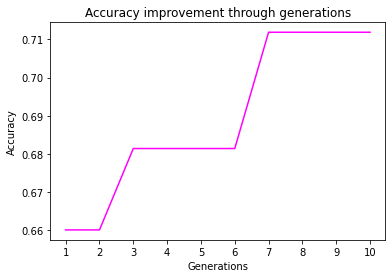

In [ ]:
generations=[1,2,3,4,5,6,7,8,9,10]
plt.plot(generations,performances,color='magenta')
plt.xlabel('Generations')
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.ylabel('Accuracy')
plt.title('Accuracy improvement through generations')
plt.show()